In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [5]:
attributes = ['name','landmass','zone','area','population','language','religion','bars','stripes','colours','red','green',
              'blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent',
              'triangle','icon','animate','text','topleft','botright']

In [6]:
data = pd.read_csv('flag.data', names=attributes)
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [7]:
#drop non numeric features
data_core = data.drop(['name', 'mainhue', 'topleft', 'botright','religion'], axis=1)
data_core.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,5,1,648,16,10,0,3,5,1,1,...,0,0,0,0,1,0,0,1,0,0
1,3,1,29,3,6,0,0,3,1,0,...,0,0,0,0,1,0,0,0,1,0
2,4,1,2388,20,8,2,0,3,1,1,...,0,0,0,0,1,1,0,0,0,0
3,6,3,0,0,1,0,0,5,1,0,...,0,0,0,0,0,0,1,1,1,0
4,3,1,0,0,6,3,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
def religions(data):
    if data == 1:
        return 0 #Christian 
    elif data == 2: #Muslims
        return 1
    else:
        return 2 #Others

In [9]:
target = data['religion'].apply(religions)
target

0      1
1      2
2      1
3      0
4      2
      ..
189    0
190    2
191    2
192    2
193    2
Name: religion, Length: 194, dtype: int64

In [10]:
scaler = StandardScaler()
standard_df = scaler.fit_transform(data_core)
standard_df = pd.DataFrame(standard_df, columns=data_core.columns)
standard_df.head()

,landmass,zone,area,population,language,bars,stripes,colours,red,green,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
0,0.921773,-0.928303,-0.024036,-0.079262,1.336144,-0.437990,0.623796,1.184519,0.517662,1.063893,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,-0.245172,-0.402090,1.720228,-0.501610,-0.299813
1,-0.369375,-0.928303,-0.309906,-0.221033,0.189189,-0.437990,-0.668195,-0.357740,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,-0.245172,-0.402090,-0.581318,1.993579,-0.299813
2,0.276199,-0.928303,0.779538,-0.035640,0.762666,1.493147,-0.668195,-0.357740,0.517662,1.063893,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.088167,4.078770,-0.402090,-0.581318,-0.501610,-0.299813
3,1.567346,0.604384,-0.323298,-0.253750,-1.244506,-0.437990,-0.668195,1.184519,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225,-0.245172,2.487003,1.720228,1.993579,-0.299813
4,-0.369375,-0.928303,-0.323298,-0.253750,0.189189,2.458716,-0.668195,-0.357740,0.517662,-0.939944,...,-0.368284,-0.388885,-0.319801,-0.343852,-0.316225,-0.245172,-0.402090,-0.581318,-0.501610,-0.299813


In [11]:
from sklearn.manifold import TSNE

In [12]:
tsne_standard_model = TSNE(n_components=2, random_state=0, perplexity=30.0, angle=0, n_iter=1000).fit_transform(standard_df)
tsne_standard_model.shape

(194, 2)

In [13]:
X = tsne_standard_model
y = target.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<AxesSubplot:title={'center':'standard t-SNE plot'}>

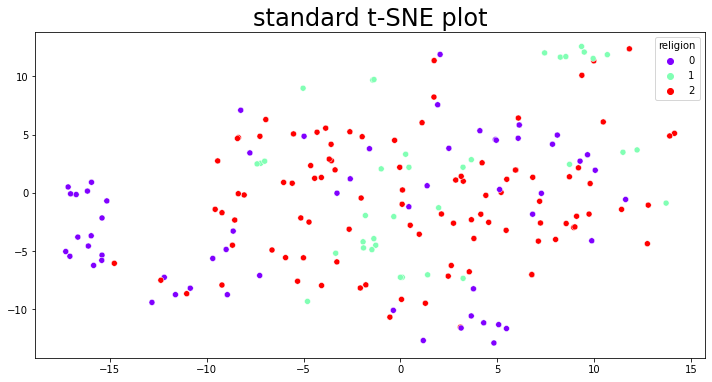

In [14]:
plt.figure(figsize=(12,6))
plt.title('standard t-SNE plot', fontsize=24)
sns.scatterplot(x=tsne_standard_model[:, 0], y=tsne_standard_model[:, 1], hue=target, palette='rainbow')

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
param_knn = {'n_neighbors':[1,5,10,15,20,25,30,45,50], 'weights':['uniform','distance'], 
              'algorithm':['ball_tree', 'kd_tree', 'brute']}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_knn)
knn_grid.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 5, 10, 15, 20, 25, 30, 45, 50],
                         'weights': ['uniform', 'distance']})

In [17]:
print(knn_grid.best_score_, '\n', knn_grid.best_estimator_)

0.674074074074074 
 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15, weights='distance')


In [18]:
from sklearn.metrics import classification_report

In [19]:
knn_pred = knn_grid.predict(X_test)

In [20]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.62      0.42      0.50        19
           1       0.57      0.50      0.53         8
           2       0.62      0.75      0.68        32

    accuracy                           0.61        59
   macro avg       0.60      0.56      0.57        59
weighted avg       0.61      0.61      0.60        59



In [21]:
param_svc = {'C':[0.1,1,10,100,1000], 'gamma':[1,0.1,0.01,0.001,0.0001], 'kernel':['linear', 'rbf']}
svc_grid = GridSearchCV(SVC(), param_svc)
svc_grid.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf']})

In [22]:
print(svc_grid.best_score_, '\n', svc_grid.best_estimator_)

0.6592592592592592 
 SVC(C=1, gamma=1)


In [23]:
svc_pred = svc_grid.predict(X_test)
print(classification_report(y_test, svc_pred))

              precision    recall  f1-score   support

           0       0.40      0.21      0.28        19
           1       0.80      0.50      0.62         8
           2       0.57      0.78      0.66        32

    accuracy                           0.56        59
   macro avg       0.59      0.50      0.52        59
weighted avg       0.55      0.56      0.53        59



In [24]:
param_rf = {'bootstrap': [True, False],
 'max_depth': [10,20,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600]
             }
rf_grid = GridSearchCV(RandomForestClassifier(), param_rf)
rf_grid.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600]})

In [25]:
print(rf_grid.best_score_, '\n', rf_grid.best_estimator_)

0.6814814814814815 
 RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=2,
                       n_estimators=600)


In [26]:
rf_pred = rf_grid.predict(X_test)
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.54      0.37      0.44        19
           1       0.50      0.88      0.64         8
           2       0.69      0.69      0.69        32

    accuracy                           0.61        59
   macro avg       0.58      0.64      0.59        59
weighted avg       0.61      0.61      0.60        59



In [27]:
X = tsne_standard_model
y = target.values

In [28]:
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "SVM.SVC",
    "Random Forest",
]

# classifiers = [
#     KNeighborsClassifier(algorithm='ball_tree', n_neighbors=25, weights='distance'),
#     SVC(kernel="rbf", C=10, gamma=0.01),
#     RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
#                        min_samples_leaf=1, min_samples_split=2, n_estimators=600)
# ]

classifiers = [
    knn_grid.best_estimator_,
    svc_grid.best_estimator_,
    rf_grid.best_estimator_
]



In [29]:
# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

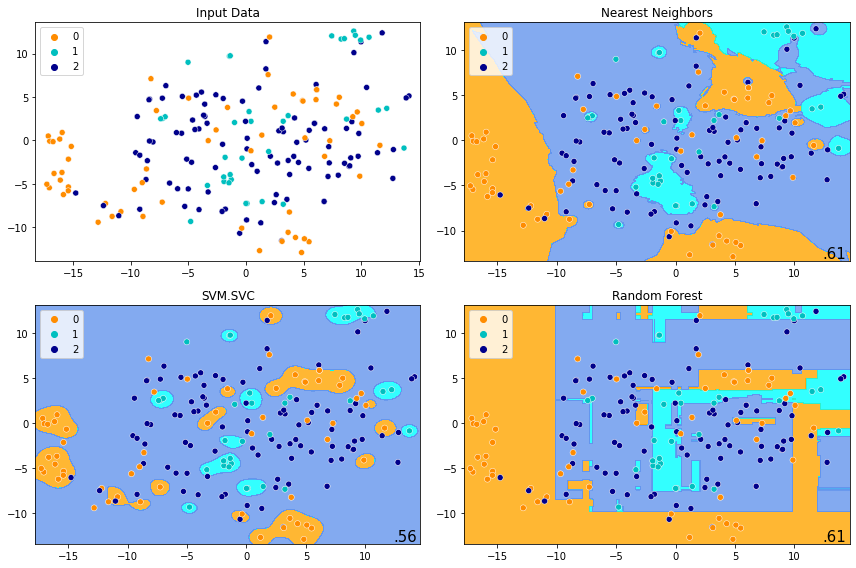

In [30]:
plt.figure(figsize=(12,8))
i = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Plot the testing points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title('Input Data')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
     
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the testing points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    
    ax.set_title(name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
    
    i += 1
        
plt.tight_layout()

In [31]:
from umap import UMAP

In [32]:
umap_standard_model = UMAP().fit_transform(standard_df)
umap_standard_model.shape

(194, 2)

<AxesSubplot:title={'center':'standard UMAP plot'}>

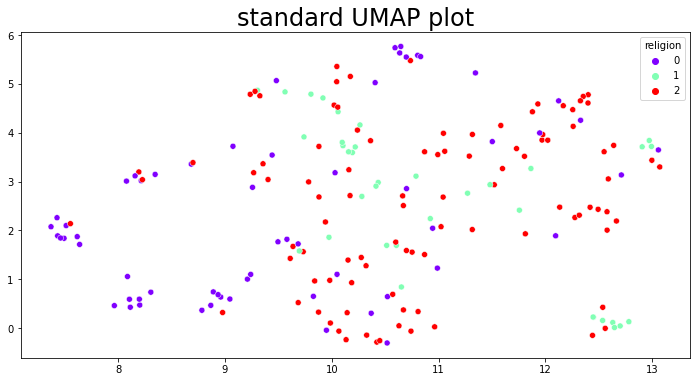

In [33]:
plt.figure(figsize=(12,6))
plt.title('standard UMAP plot', fontsize=24)
sns.scatterplot(x=umap_standard_model[:, 0], y=umap_standard_model[:, 1], hue=target, palette='rainbow')

In [34]:
X = umap_standard_model
y = target

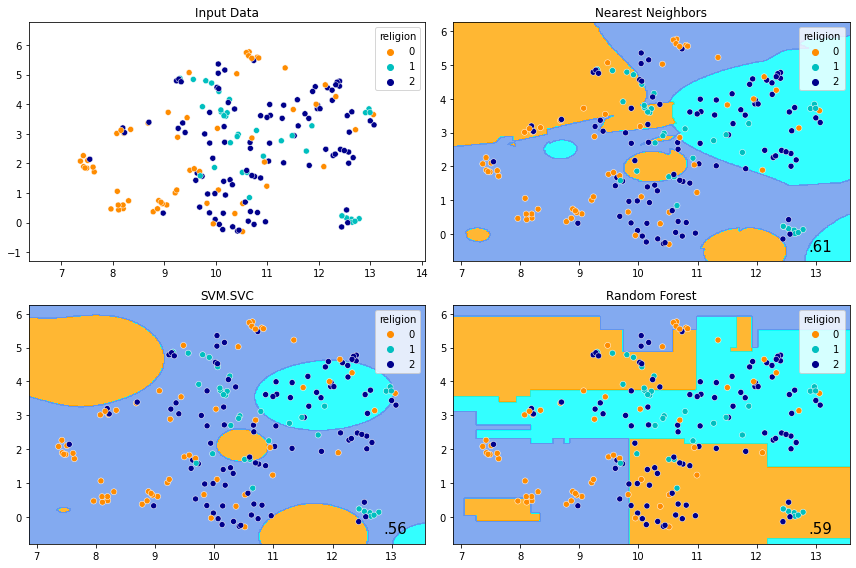

In [36]:
plt.figure(figsize=(12,8))
i = 1

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
ax = plt.subplot(2, 2, i)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))


# Plot the testing points
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_title('Input Data')

i += 1

# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, 2, i)
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
     
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].   
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.8)

    # Plot the testing points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette=cmap_bold, edgecolors="k")

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    
    ax.set_title(name)
    ax.text(xx.max() - 0.3, yy.min() + 0.3, ("%.2f" % score).lstrip("0"), size=15, horizontalalignment="right")
    
    i += 1
        
plt.tight_layout()